<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Metrics/Metrics_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você receberá uma base referente a empréstimo pessoal, onde a sua variável target será a Personal_Loan.
Faça o treinamento e teste com LogisticRegression e analise cada uma das métricas apresentadas

In [1]:
%pip install scikit-learn==1.0.2
import pandas as pd

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the Data

In [2]:
df_abt = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx')
df_abt.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [3]:
df_abt = df_abt.dropna()

# Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
X = df_abt[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df_abt['Personal_Loan'].copy()
y = pd.DataFrame(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Feature Engineering

In [7]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CreditCard,Securities_Account,CD_Account,Online
321,44,20,101,3,4.4,2,82,0,0,0,0
3953,50,26,52,4,0.1,3,0,0,0,0,0
4237,60,34,78,3,4.4,1,0,0,1,0,0
720,58,32,38,1,2.2,3,0,0,0,0,0
2125,44,20,93,4,0.8,1,101,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1051,33,7,54,4,0.2,1,141,0,1,0,0
2592,57,32,69,4,0.7,1,245,0,0,0,0
1556,31,1,60,4,4.0,3,244,0,0,0,0
2583,37,11,71,1,2.5,1,185,1,0,0,1


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CreditCard,Securities_Account,CD_Account,Online,churn,label
3223,43,18,29,1,0.5,3,0,0,0,0,1,0,0
2127,40,14,179,2,0.0,1,0,0,0,0,0,0,0
2641,29,5,133,1,5.4,1,212,0,0,0,1,0,0
2801,58,34,41,4,0.4,1,177,0,0,0,1,0,0
1517,52,26,45,4,1.8,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,34,9,191,1,4.8,3,0,1,0,1,1,1,1
3964,43,18,78,4,1.9,3,0,0,0,0,0,0,0
4808,42,16,32,3,0.5,2,0,1,0,0,0,0,0
2319,34,9,198,2,3.0,1,422,0,0,0,1,0,1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


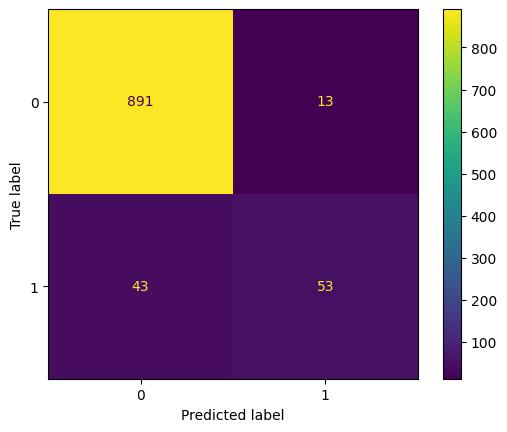

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, values_format='d');

In [12]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.95325
Acurácia (Teste): 0.944
Acurácia Balanceada (Treino): 0.7995713495575221
Acurácia Balanceada (Teste): 0.768851401179941
Precision (Treino): 0.8634686346863468
Precision (Teste): 0.803030303030303
Recall (Treino): 0.609375
Recall (Teste): 0.5520833333333334
F1-Score (Treino): 0.7145038167938931
F1-Score (Teste): 0.654320987654321
ROCAUC (Treino): 0.9499886211744102
ROCAUC (Teste): 0.943941279498525


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


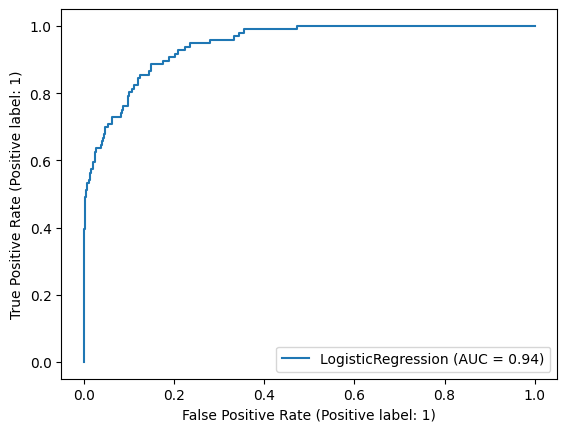

In [13]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_test, y_test);

In [14]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.95325,0.799571,0.863469,0.609375,0.714504,0.949989
1,Logistic Regression,teste,0.94400,0.768851,0.803030,0.552083,0.654321,0.943941
